In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd/content/drive/MyDrive/DCC/kfood_health_train

/content/drive/.shortcut-targets-by-id/1aRxXQtAiJaWsGtgAfsZr46lMlTYRpdf6/kfood_health_train


In [ ]:
ls

가리비/  고등어/  낚지볶음/    된장찌개/  모듬초밥/  부대찌개/  오리로스구이/
갈비찜/  김치국/  돼지갈비찜/  떡국/      배추김치/  순대/


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import torchvision.models as models
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import os
import unicodedata
import matplotlib.image as mpimg
from torch.utils.data import DataLoader
import natsort
from torchvision import models
import torch.nn.functional as F
from torchsummary import summary
import warnings
import time

In [ ]:
# CUDA 사용 가능 여부 확인 및 디바이스 설정
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
# 데이터셋 경로 설정 (kfood_health)
data_root = "/content/drive/MyDrive/DCC"
train_dir = os.path.join(data_root, "kfood_health_train")
val_dir = os.path.join(data_root, "kfood_health_val")

In [ ]:
# 이미지 전처리 및 데이터셋 설정
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) #imageNet mean/std사용
    ])

train_dataset = ImageFolder(train_dir, transform=transform)
val_dataset = ImageFolder(val_dir, transform=transform)

# 데이터로더 설정
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [ ]:
!sudo apt-get install -y fonts-nanum*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [ ]:
import matplotlib.font_manager as fm

# 나눔 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)

plt.rcParams['font.family'] = 'NanumGothic'  # 폰트 패밀리 이름 (폰트 파일명과 동일해야 함)
plt.rcParams['font.size'] = 12

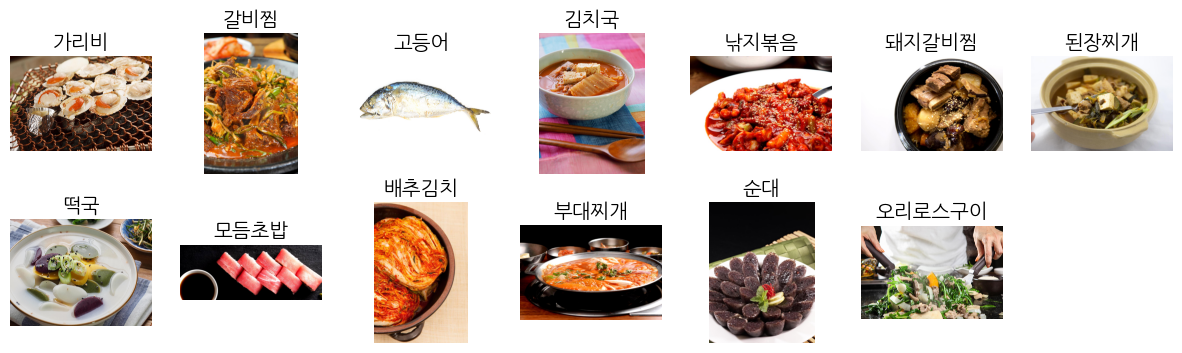

In [ ]:
menu_folders = os.listdir(train_dir)
menu_folders = natsort.natsorted(menu_folders)
plt.figure(figsize=(15, 15))

for i, trainfolder in enumerate(menu_folders):
    trainmenu_path = os.path.join(train_dir, trainfolder)
    imgfiles = os.listdir(trainmenu_path)

    for j, imgfile in enumerate(imgfiles[:1]):  # Take 1 image from each folder
        imgpath = os.path.join(trainmenu_path, imgfile)
        img = mpimg.imread(imgpath)

        name = unicodedata.normalize('NFC', trainfolder)  # Normalize the folder name
        plt.subplot(7, 7, i + 1)
        plt.imshow(img)
        plt.title(name)
        plt.axis('off')

plt.show()

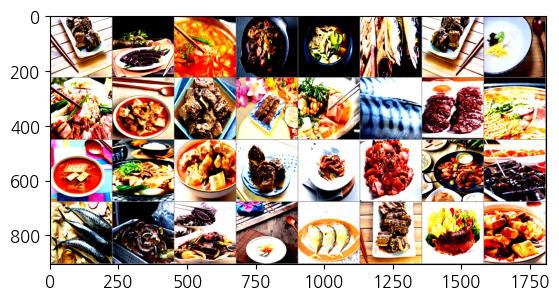

갈비찜 순대 부대찌개 돼지갈비찜 된장찌개 고등어 돼지갈비찜 떡국 오리로스구이 김치국 돼지갈비찜 순대 부대찌개 고등어 순대 부대찌개 김치국 갈비찜 김치국 돼지갈비찜 낚지볶음 낚지볶음 갈비찜 순대 고등어 순대 갈비찜 떡국 고등어 갈비찜 오리로스구이 김치국


In [ ]:
def imshow(img):
    img = img / 2 + 0.5  #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{menu_folders[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
# 모델 정의 (ResNet-18)
resnet18 = models.resnet18(pretrained=False).to(device)

# 마지막 Fully Connected Layer 변경
num_classes = 42  # 클래스 수
resnet18.fc = nn.Linear(resnet18.fc.in_features, num_classes)

# 모델을 GPU로 이동
device = 'cuda' if torch.cuda.is_available() else 'cpu'
resnet18.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

torch.Size([64, 3, 7, 7])


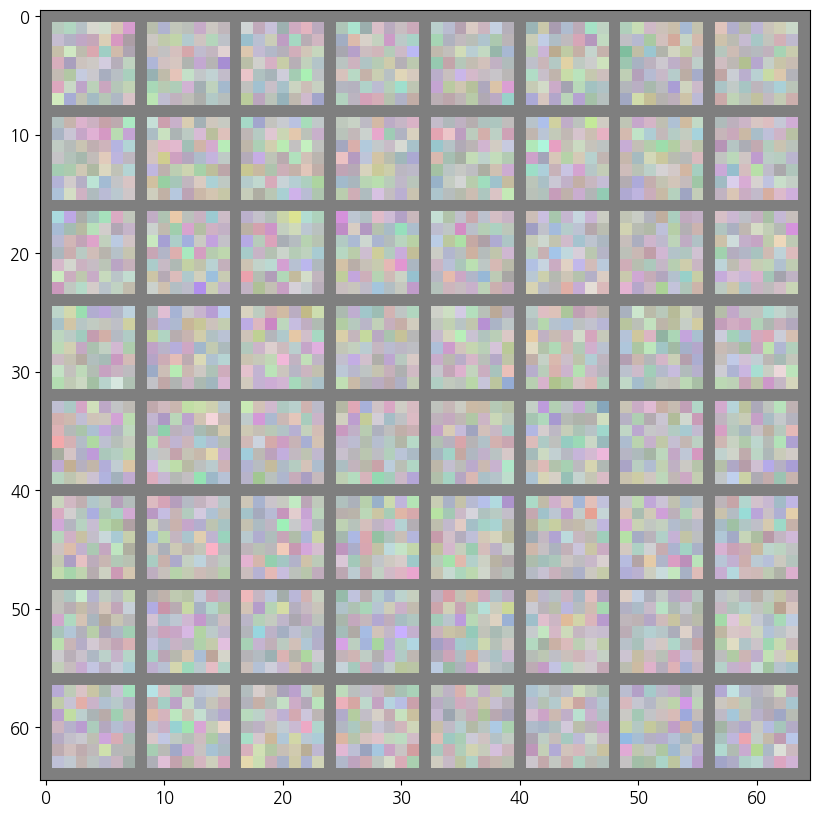

In [ ]:
# 첫 번째 layer의 filter를 확인 (=가중치 확인) -> 학습안된 모델
for w in resnet18.parameters():
    w = w.data.cpu()
    print(w.shape)
    break

# 가중치 renormalization
min_w = torch.min(w)
w1 = (-1/(2 * min_w)) * w + 0.5

# make grid to display it
grid_size = len(w1)
x_grid = [w1[i] for i in range(grid_size)]
x_grid = torchvision.utils.make_grid(x_grid, nrow=8, padding=1)

plt.figure(figsize=(10, 10))
imshow(x_grid)

In [ ]:
model_load_path='/content/drive/MyDrive/model_path/mission1.pt'
checkpoint = torch.load(model_load_path)

# 모델정의 : 사전에 학습된 파라마터 적용
resnet18.load_state_dict(checkpoint['model_state_dict'])

# 모델 아키텍처 수정 (linear probing)
num_classes = 13  # 새로운 데이터셋의 클래스 수
resnet18.fc = nn.Linear(512, num_classes)

# 모델을 GPU로 이동
device = 'cuda' if torch.cuda.is_available() else 'cpu'
resnet18.to(device)

# Loss 및 Optimizer 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr=0.01, momentum=0.9)

torch.Size([64, 3, 7, 7])


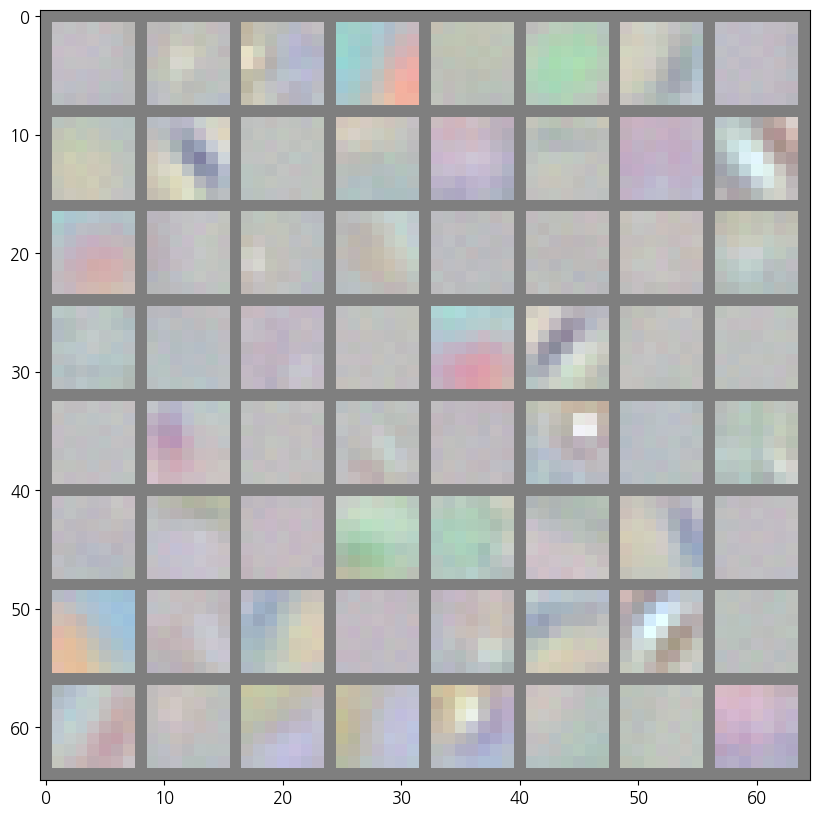

In [ ]:
# 첫 번째 layer의 filter를 확인 (=가중치 확인) -> 학습된 모델
for w in resnet18.parameters():
    w = w.data.cpu()
    print(w.shape)
    break

# 가중치 renormalization
min_w = torch.min(w)
w1 = (-1/(2 * min_w)) * w + 0.5

# make grid to display it
grid_size = len(w1)
x_grid = [w1[i] for i in range(grid_size)]
x_grid = torchvision.utils.make_grid(x_grid, nrow=8, padding=1)

plt.figure(figsize=(10, 10))
imshow(x_grid)

In [ ]:
# 모델 저장 코드
model_save_path = '/content/drive/MyDrive/DCC/mission003.pt'

In [ ]:
# 초기 모델 학습
# 학습할 에폭 수
num_epochs = 50
# 정확도 저장용 리스트
accuracy_list = []
# 모델을 저장하는 epoch주기
save_epochs = 1
# 검증 주기
validation_epochs = 1

for epoch in range(num_epochs):
    resnet18.train()
    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            optimizer.zero_grad()

            outputs = resnet18(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 500 == 499:
                print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
                running_loss = 0.0

        # 모델 저장 (필요한 경우)
    if (epoch + 1) % save_epochs == 0:
        checkpoint = {
            'epoch': epoch + 1,
            'model_state_dict': resnet18.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
        }
        torch.save(checkpoint, model_save_path)

  # Initialize misclassified_examples list before the loop
    misclassified_examples = []

# 검증 데이터셋을 이용하여 accuracy를 계산하고 출력
    if epoch % validation_epochs == 0:
        resnet18.eval()  # 모델을 평가 모드로 전환
        correct = 0
        total = 0

        with torch.no_grad():
            for data in val_loader:
                inputs, labels = data[0].to(device), data[1].to(device)
                outputs = resnet18(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
          # 잘못 분류된 경우 확인

            misclassified_mask = predicted != labels
            misclassified_examples.extend([(inputs[i], predicted[i].item(), labels[i].item()) for i, is_misclassified in enumerate(misclassified_mask) if is_misclassified])


        accuracy = 100 * correct / total
        accuracy_list.append(accuracy)  # accuracy 리스트에 추가
        print(f'Validation Accuracy after {epoch+1} epochs: {accuracy:.2f}%')

        resnet18.train()  # 모델을 다시 학습 모드로 전환

print('Continued Training Finished')

# 에폭별 accuracy 시각화
plt.plot(range(1, num_epochs + 1), accuracy_list, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Over Epochs')
plt.grid(True)
plt.show()

Validation Accuracy after 1 epochs: 89.29%


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-117ef21847be>", line 15, in <cell line: 11>
    for i, data in enumerate(train_loader, 0):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 630, in __next__
    data = self._next_data()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 674, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/usr/local/lib/python3.10/dist-pa

저장된 모델을 불러온 후 이어서 학습

Validation Accuracy after 2 epochs: 91.84%
Validation Accuracy after 3 epochs: 93.31%
Validation Accuracy after 4 epochs: 92.91%
Validation Accuracy after 5 epochs: 93.82%
Validation Accuracy after 6 epochs: 93.20%
Validation Accuracy after 7 epochs: 93.99%
Validation Accuracy after 8 epochs: 93.76%
Validation Accuracy after 9 epochs: 94.05%
Validation Accuracy after 10 epochs: 93.99%
Validation Accuracy after 11 epochs: 93.37%
Validation Accuracy after 12 epochs: 94.27%
Validation Accuracy after 13 epochs: 93.59%
Validation Accuracy after 14 epochs: 93.99%
Validation Accuracy after 15 epochs: 94.16%
Validation Accuracy after 16 epochs: 93.93%
Validation Accuracy after 17 epochs: 93.99%
Validation Accuracy after 18 epochs: 93.71%
Validation Accuracy after 19 epochs: 93.93%
Validation Accuracy after 20 epochs: 93.88%
Validation Accuracy after 21 epochs: 93.99%
Validation Accuracy after 22 epochs: 94.05%
Validation Accuracy after 23 epochs: 93.82%
Validation Accuracy after 24 epochs: 94.

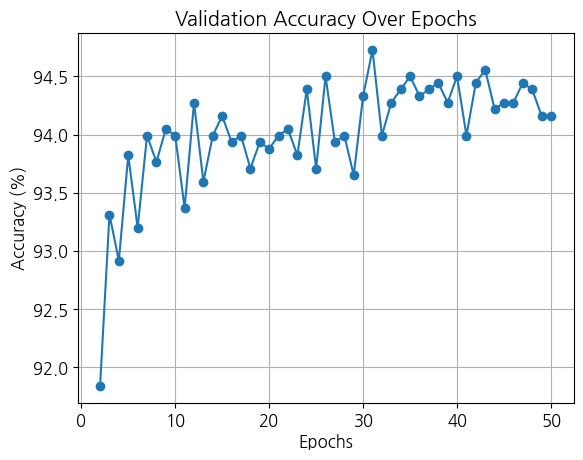

In [ ]:
#모델 불러온 후 이어서 학습
# 저장된 모델 위치
model_load_path = '/content/drive/MyDrive/DCC/mission003.pt'
# 저장할 모델 위치
model_save_path = '/content/drive/MyDrive/DCC/mission013.pt'

# 모델 아키텍처 수정 (linear probing)
num_classes = 13  # 새로운 데이터셋의 클래스 수
resnet18.fc = nn.Linear(512, num_classes)

# 모델 불러오기
checkpoint = torch.load(model_load_path)
resnet18.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epochs = checkpoint['epoch']
loss = checkpoint['loss']

# 모델을 GPU로 이동
device = 'cuda' if torch.cuda.is_available() else 'cpu'
resnet18.to(device)

# Loss 및 Optimizer 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr=0.01, momentum=0.9)

# 정확도 저장용 리스트
accuracy_list = []
# 이어서 학습할 에폭 수
additional_epochs = 49
# 모델을 저장하는 epoch주기
save_epochs = 1
# 검증 주기
validation_epochs = 1
# Training loop (이어서 학습)
for epoch in range(epochs, epochs + additional_epochs):
    resnet18.train()
    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 500 == 499:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

    # 모델 저장 (필요한 경우)
    if (epoch + 1) % save_epochs == 0:
        checkpoint = {
            'epoch': epoch + 1,
            'model_state_dict': resnet18.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
        }
        torch.save(checkpoint, model_save_path)

   # Initialize misclassified_examples list before the loop
    misclassified_examples = []

# 검증 데이터셋을 이용하여 accuracy를 계산하고 출력
    if epoch % validation_epochs == 0:
        resnet18.eval()  # 모델을 평가 모드로 전환
        correct = 0
        total = 0

        with torch.no_grad():
            for data in val_loader:
                inputs, labels = data[0].to(device), data[1].to(device)
                outputs = resnet18(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
           # 잘못 분류된 경우 확인

            misclassified_mask = predicted != labels
            misclassified_examples.extend([(inputs[i], predicted[i].item(), labels[i].item()) for i, is_misclassified in enumerate(misclassified_mask) if is_misclassified])


        accuracy = 100 * correct / total
        accuracy_list.append(accuracy)  # accuracy 리스트에 추가
        print(f'Validation Accuracy after {epoch+1} epochs: {accuracy:.2f}%')

        resnet18.train()  # 모델을 다시 학습 모드로 전환

print('Continued Training Finished')

# 에폭별 accuracy 시각화
plt.plot(range(epochs + 1, epochs + additional_epochs + 1), accuracy_list, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Over Epochs')
plt.grid(True)
plt.show()

In [ ]:
accuracy_list.insert(0, 89.29)
accuracy_list

[89.29,
 91.83673469387755,
 93.31065759637188,
 92.91383219954649,
 93.82086167800453,
 93.19727891156462,
 93.99092970521542,
 93.7641723356009,
 94.04761904761905,
 93.99092970521542,
 93.36734693877551,
 94.27437641723355,
 93.59410430839003,
 93.99092970521542,
 94.16099773242631,
 93.93424036281179,
 93.99092970521542,
 93.70748299319727,
 93.93424036281179,
 93.87755102040816,
 93.99092970521542,
 94.04761904761905,
 93.82086167800453,
 94.38775510204081,
 93.70748299319727,
 94.50113378684807,
 93.93424036281179,
 93.99092970521542,
 93.65079365079364,
 94.33106575963718,
 94.72789115646259,
 93.99092970521542,
 94.27437641723355,
 94.38775510204081,
 94.50113378684807,
 94.33106575963718,
 94.38775510204081,
 94.44444444444444,
 94.27437641723355,
 94.50113378684807,
 93.99092970521542,
 94.44444444444444,
 94.5578231292517,
 94.21768707482993,
 94.27437641723355,
 94.27437641723355,
 94.44444444444444,
 94.38775510204081,
 94.16099773242631,
 94.16099773242631]

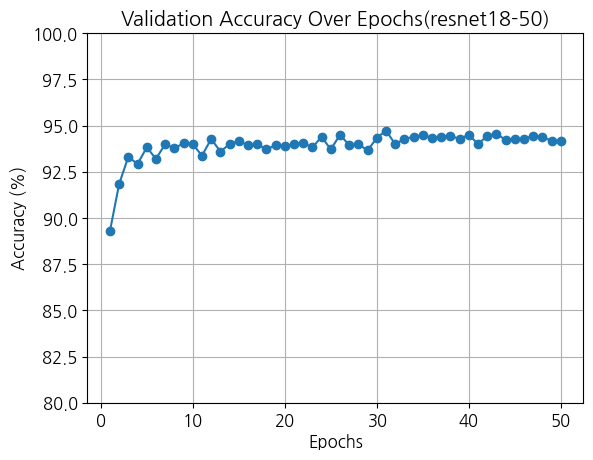

In [ ]:
# 에폭별(1~50) accuracy 시각화
plt.plot(range(1, 51), accuracy_list, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Over Epochs(resnet18-50)')
plt.grid(True)
plt.ylim(80,100)
plt.show()

50 에폭까지 학습된 모델 검증

Epoch [50/50], Loss: 0.0001, Accuracy: 94.16%
Validation Accuracy: 94.16%
Accuracy for class: 가리비 is 98.06%
Accuracy for class: 갈비찜 is 71.52%
Accuracy for class: 고등어 is 98.54%
Accuracy for class: 김치국 is 97.58%
Accuracy for class: 낚지볶음 is 96.72%
Accuracy for class: 돼지갈비찜 is 79.44%
Accuracy for class: 된장찌개 is 96.33%
Accuracy for class: 떡국 is 98.31%
Accuracy for class: 모듬초밥 is 95.65%
Accuracy for class: 배추김치 is 96.09%
Accuracy for class: 부대찌개 is 98.60%
Accuracy for class: 순대 is 97.70%
Accuracy for class: 오리로스구이 is 98.14%
Sample 1: Incorrectly predicted - True label: 가리비, Predicted label: 된장찌개


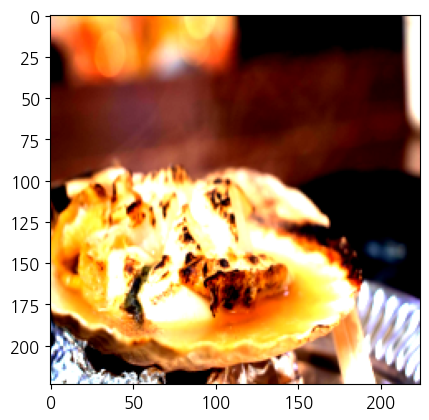

Sample 2: Incorrectly predicted - True label: 가리비, Predicted label: 김치국


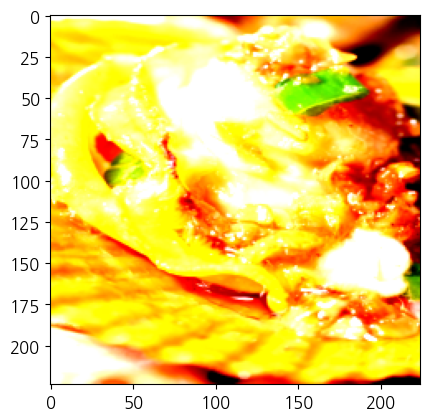

Sample 1: Incorrectly predicted - True label: 갈비찜, Predicted label: 돼지갈비찜


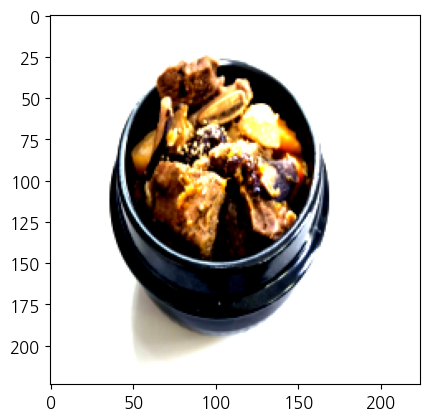

Sample 2: Incorrectly predicted - True label: 갈비찜, Predicted label: 돼지갈비찜


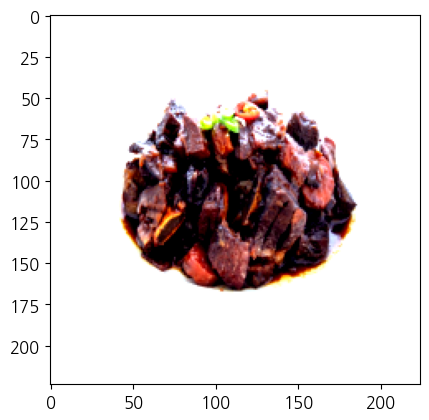

Sample 3: Incorrectly predicted - True label: 갈비찜, Predicted label: 돼지갈비찜


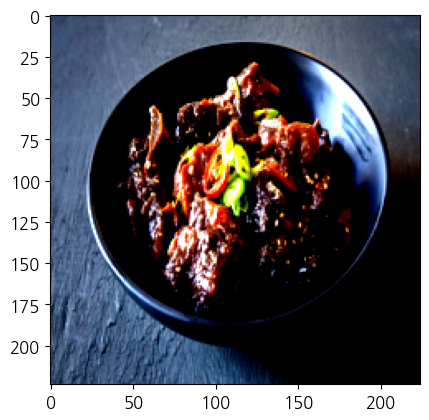

Sample 1: Incorrectly predicted - True label: 고등어, Predicted label: 가리비


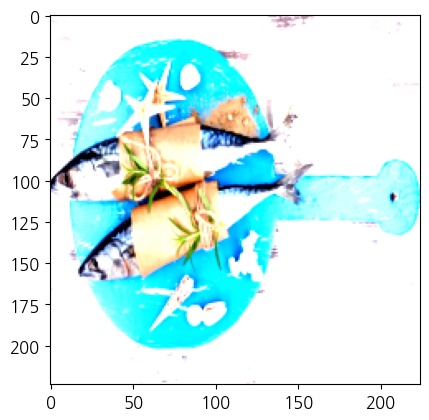

Sample 2: Incorrectly predicted - True label: 고등어, Predicted label: 모듬초밥


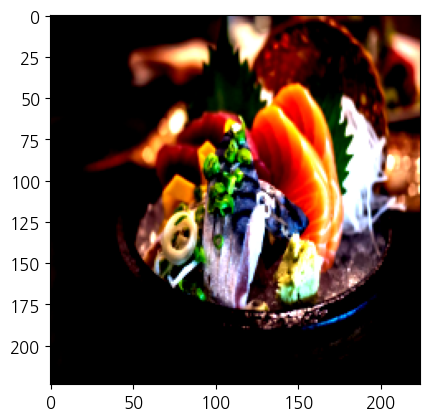

Sample 1: Incorrectly predicted - True label: 김치국, Predicted label: 된장찌개


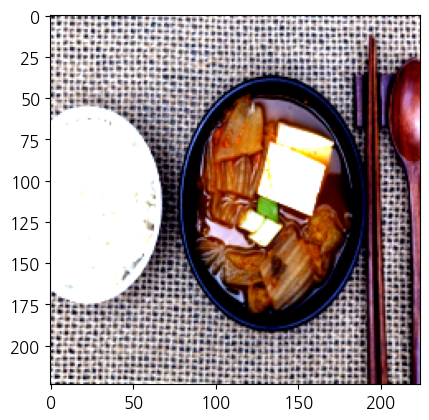

Sample 2: Incorrectly predicted - True label: 김치국, Predicted label: 부대찌개


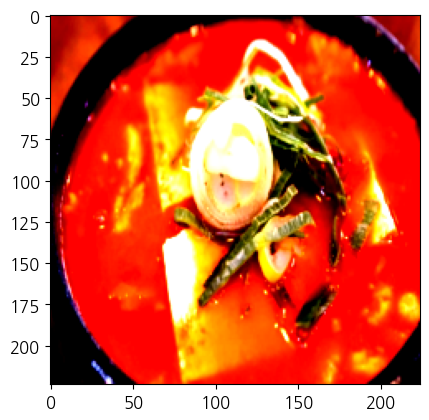

Sample 3: Incorrectly predicted - True label: 김치국, Predicted label: 가리비


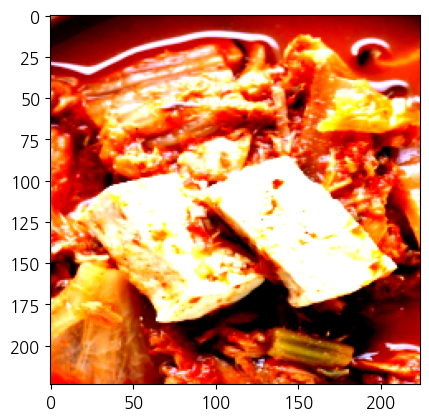

Sample 1: Incorrectly predicted - True label: 낚지볶음, Predicted label: 부대찌개


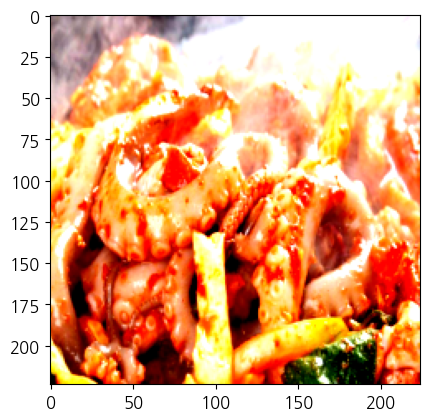

Sample 2: Incorrectly predicted - True label: 낚지볶음, Predicted label: 부대찌개


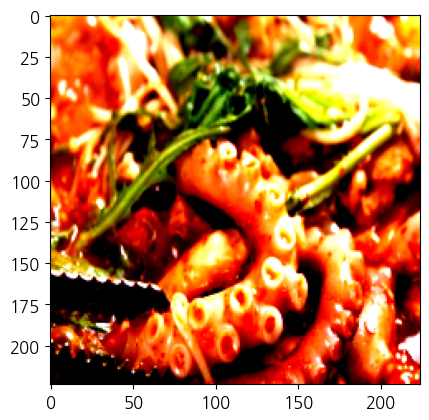

Sample 3: Incorrectly predicted - True label: 낚지볶음, Predicted label: 부대찌개


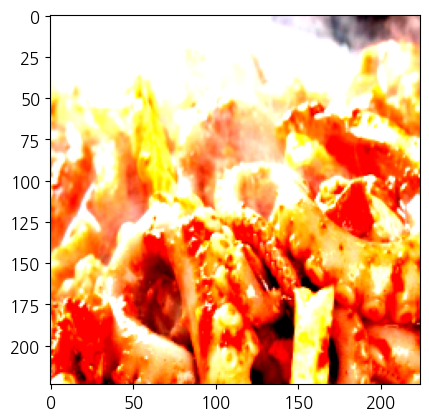

Sample 1: Incorrectly predicted - True label: 돼지갈비찜, Predicted label: 갈비찜


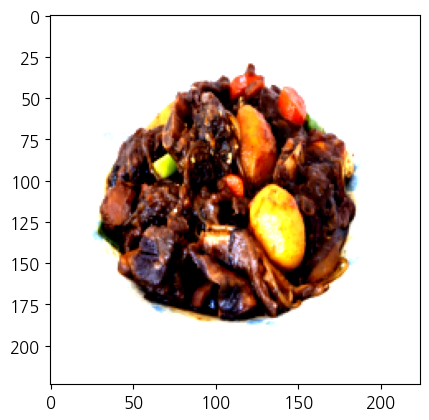

Sample 2: Incorrectly predicted - True label: 돼지갈비찜, Predicted label: 갈비찜


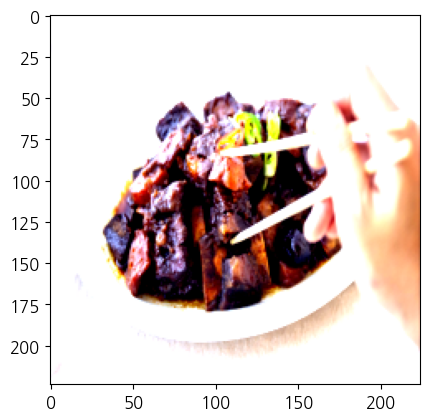

Sample 3: Incorrectly predicted - True label: 돼지갈비찜, Predicted label: 갈비찜


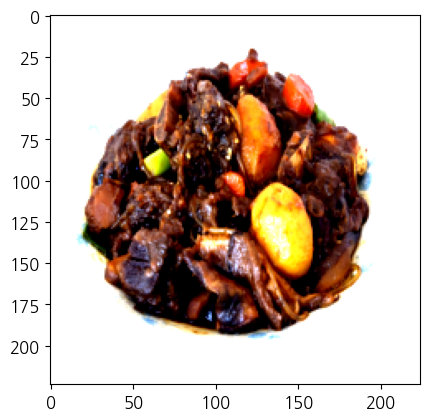

Sample 1: Incorrectly predicted - True label: 된장찌개, Predicted label: 부대찌개


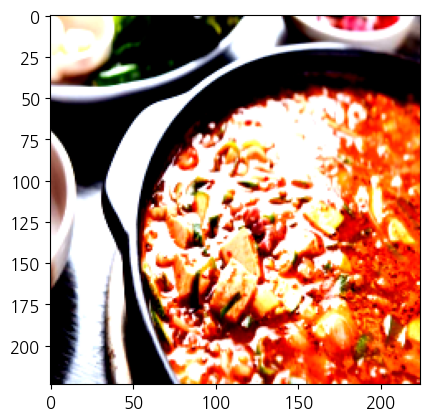

Sample 2: Incorrectly predicted - True label: 된장찌개, Predicted label: 김치국


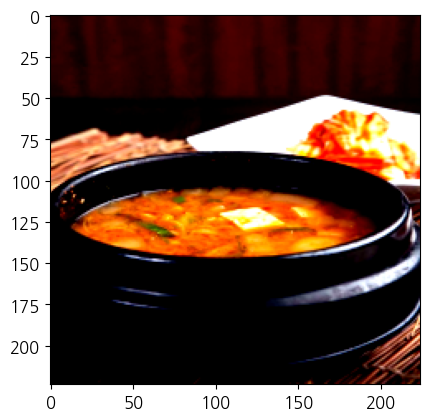

Sample 3: Incorrectly predicted - True label: 된장찌개, Predicted label: 김치국


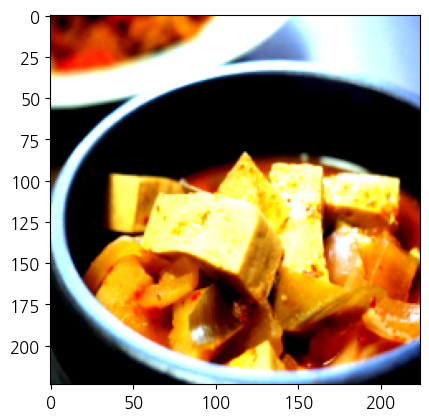

Sample 1: Incorrectly predicted - True label: 떡국, Predicted label: 모듬초밥


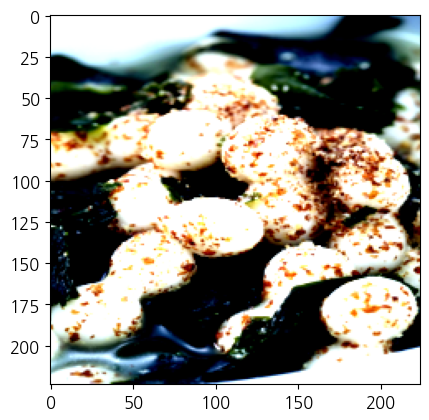

Sample 2: Incorrectly predicted - True label: 떡국, Predicted label: 가리비


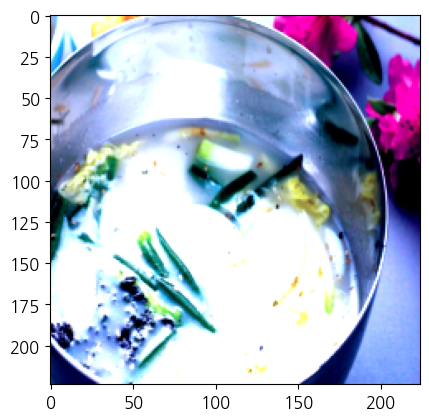

Sample 1: Incorrectly predicted - True label: 모듬초밥, Predicted label: 가리비


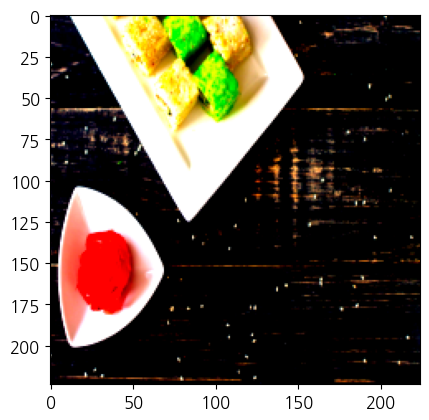

Sample 2: Incorrectly predicted - True label: 모듬초밥, Predicted label: 된장찌개


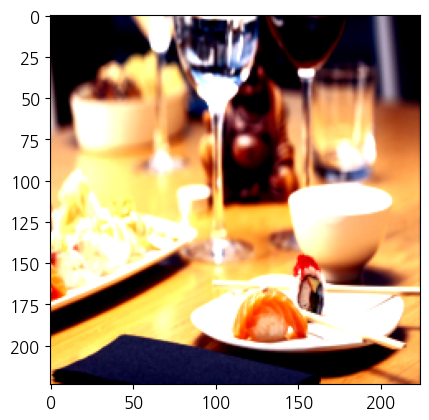

Sample 3: Incorrectly predicted - True label: 모듬초밥, Predicted label: 가리비


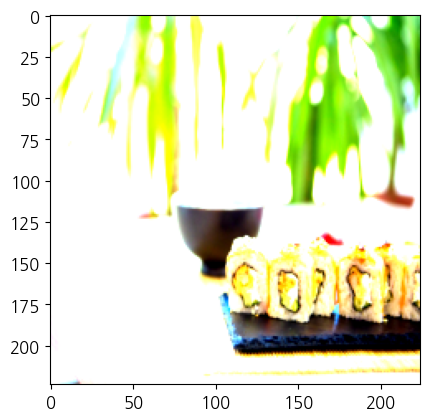

Sample 1: Incorrectly predicted - True label: 배추김치, Predicted label: 모듬초밥


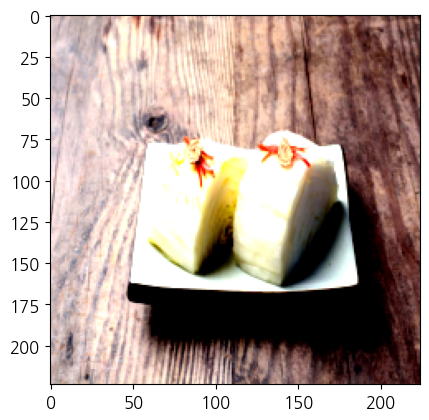

Sample 2: Incorrectly predicted - True label: 배추김치, Predicted label: 오리로스구이


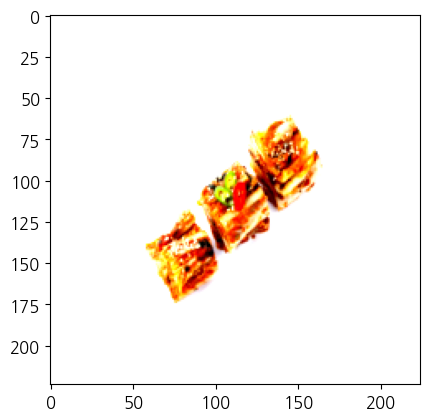

Sample 3: Incorrectly predicted - True label: 배추김치, Predicted label: 낚지볶음


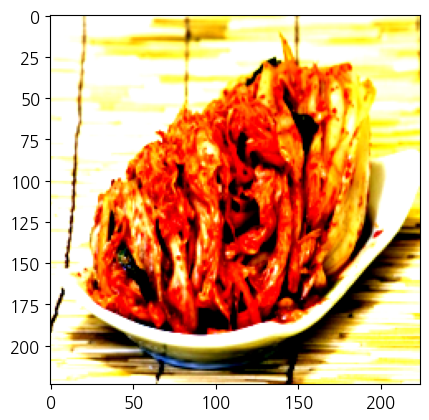

Sample 1: Incorrectly predicted - True label: 부대찌개, Predicted label: 된장찌개


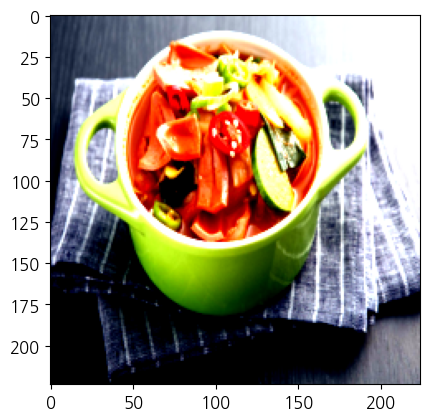

Sample 2: Incorrectly predicted - True label: 부대찌개, Predicted label: 된장찌개


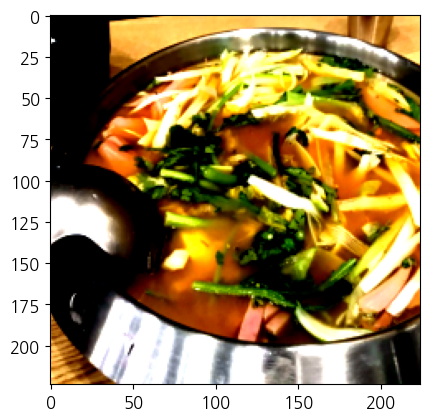

Sample 3: Incorrectly predicted - True label: 부대찌개, Predicted label: 김치국


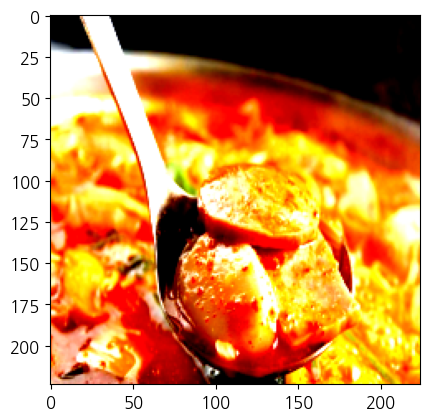

Sample 1: Incorrectly predicted - True label: 순대, Predicted label: 갈비찜


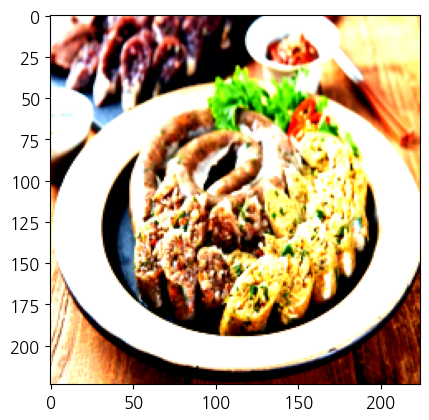

Sample 2: Incorrectly predicted - True label: 순대, Predicted label: 모듬초밥


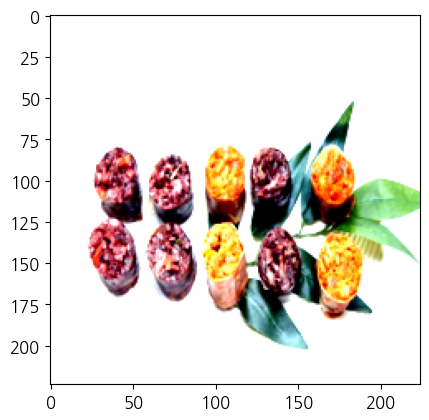

Sample 1: Incorrectly predicted - True label: 오리로스구이, Predicted label: 돼지갈비찜


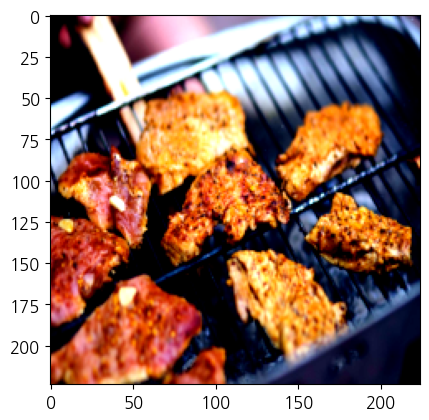

Sample 2: Incorrectly predicted - True label: 오리로스구이, Predicted label: 순대


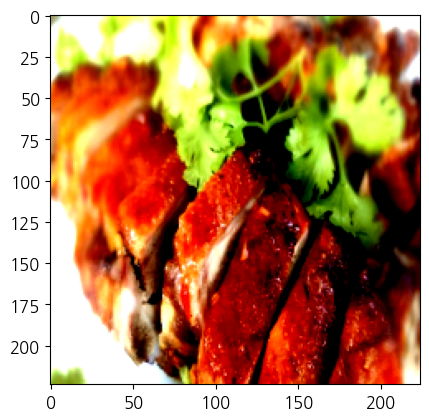

Sample 3: Incorrectly predicted - True label: 오리로스구이, Predicted label: 떡국


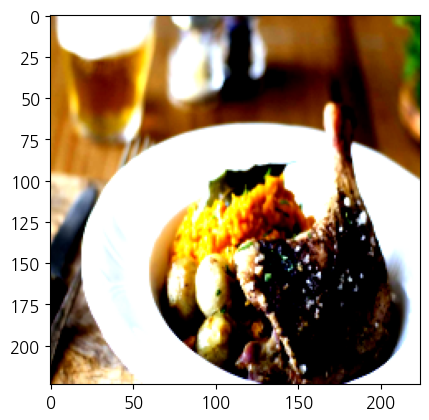

Finished Training


In [ ]:
num_epochs = 50 #총 학습할 에폭 수
# Validation
resnet18.eval()  # 평가 모드로 설정
correct = 0
total = 0

# 각 클래스별 정확도를 저장하기 위한 리스트 초기화
class_correct = [0] * len(menu_folders)
class_total = [0] * len(menu_folders)

# 맞춘 이미지와 못 맞춘 이미지를 저장하기 위한 리스트 초기화
correct_samples = []
incorrect_samples = []

with torch.no_grad():
    for data in val_loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = resnet18(inputs)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # 각 클래스별로 정확도 계산
        for i in range(len(labels)):
            label = labels[i].item()
            class_correct[label] += (predicted[i] == label).item()
            class_total[label] += 1
            # 맞춘 이미지와 못 맞춘 이미지를 분류
            if predicted[i] == label:
                correct_samples.append((inputs[i], label))
            else:
                incorrect_samples.append((inputs[i], label, predicted[i]))

accuracy = 100 * correct / total

# 현재 epoch 결과 출력
print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%')
print(f'Validation Accuracy: {accuracy:.2f}%')

# 각 클래스별 정확도 출력
for i, folder in enumerate(menu_folders):
    class_acc = 100 * class_correct[i] / class_total[i]
    print(f'Accuracy for class: {folder} is {class_acc:.2f}%')

num_images_per_folder = 3  # 각 폴더에서 출력할 이미지 수
# 맞춘 이미지와 못 맞춘 이미지 출력
# 맞춘 이미지 출력
'''
for i, (input, true_label) in enumerate(incorrect_sample):
    input_cpu = input.cpu()  # 이미지를 CPU로 복사
    print(f'Sample {i + 1}: Correctly predicted - True label: {menu_folders[true_label]}')
    imshow(input_cpu)  # CPU 이미지 출력
'''

for folder_index, folder_name in enumerate(menu_folders):
    # 각 폴더에 대해 출력할 이미지 선택
    folder_images = [(input, true_label, predicted_label) for input, true_label, predicted_label in incorrect_samples if true_label == folder_index]
    num_images_to_display = min(num_images_per_folder, len(folder_images))  # 폴더에서 출력할 이미지 수 선택

    for i, (input, true_label, predicted_label) in enumerate(folder_images[:num_images_to_display]):
        input_cpu = input.cpu()
        print(f'Sample {i + 1}: Incorrectly predicted - True label: {menu_folders[true_label]}, Predicted label: {menu_folders[predicted_label]}')
        imshow(input_cpu)  # CPU 이미지 출력

print('Finished Training')
